# For using the model.py and loader.py scripts

In [175]:
import matplotlib.pyplot as plt
from src.datapipeline.loader import DataLoader
from src.modelling.model import Model
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading data with DataLoader class

In [176]:
dl = DataLoader()
dl.init_generator()
train_data, val_data, test_data = dl.load_data()

Found 84878 images belonging to 5 classes.
Found 16041 images belonging to 5 classes.
Found 16010 images belonging to 5 classes.


##### Next few cells are for preview only

In [177]:
train_data.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3, 'surprise': 4}

C:\Users\Alvin\anaconda3\envs\aiap\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


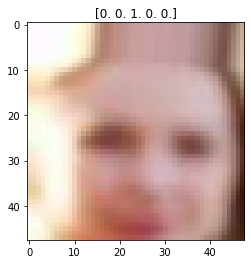

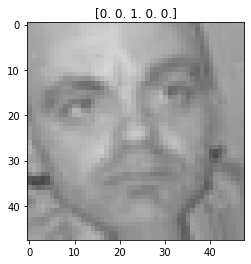

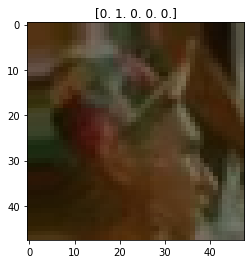

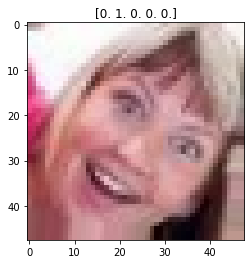

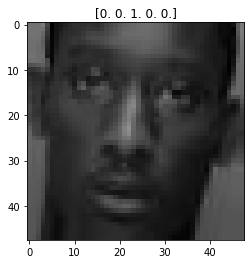

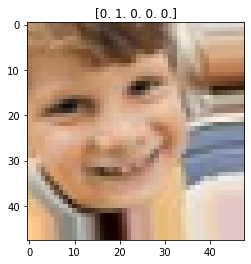

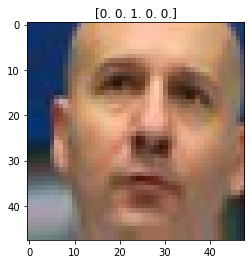

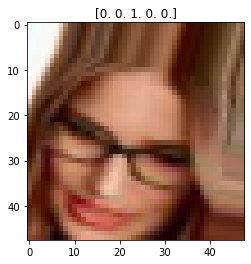

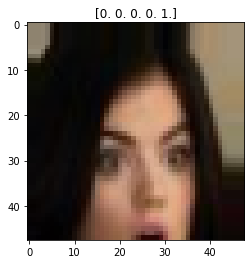

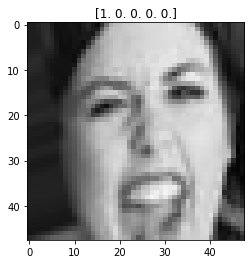

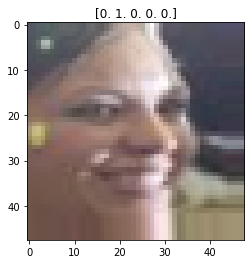

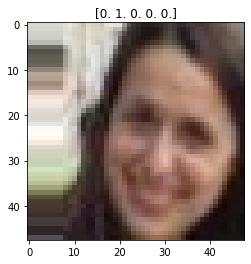

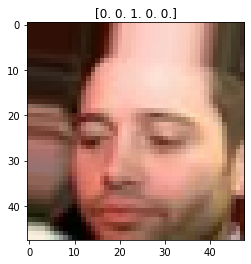

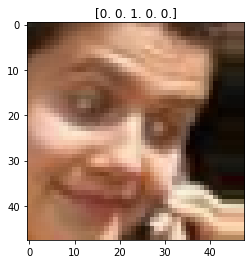

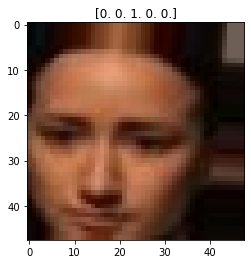

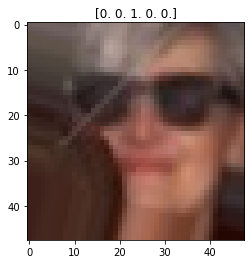

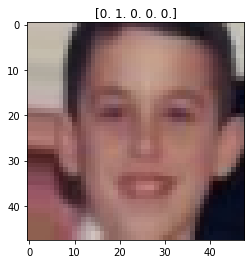

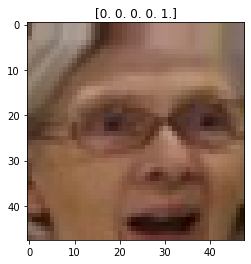

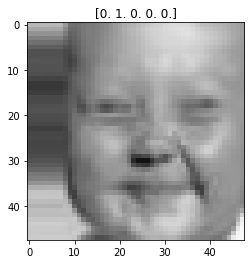

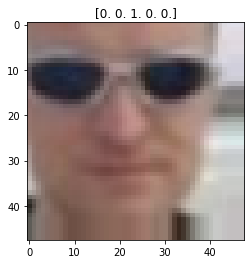

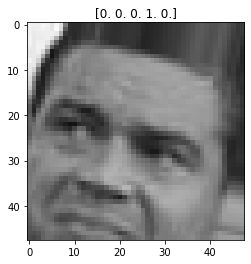

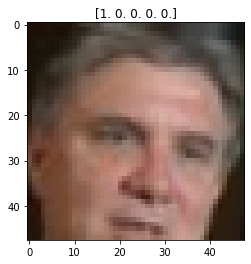

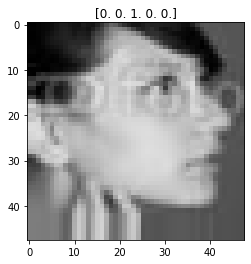

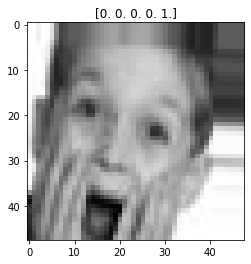

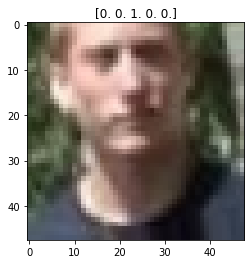

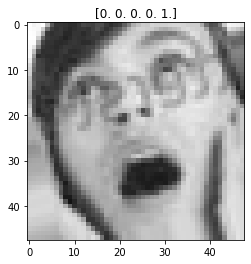

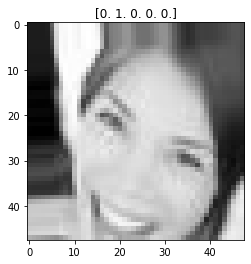

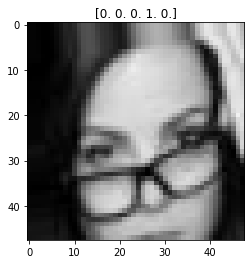

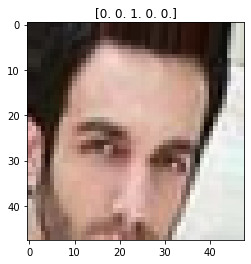

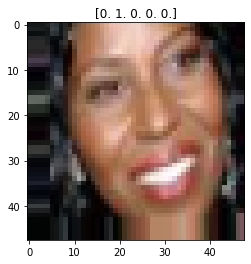

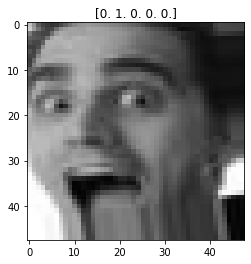

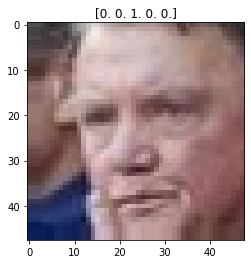

In [178]:
x_batch, y_batch = next(train_data)
for i in range (0,32):
    image = x_batch[i].astype(int)
    plt.imshow(image)
    plt.title(y_batch[i])
    plt.show()

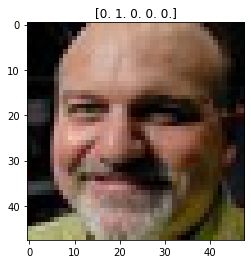

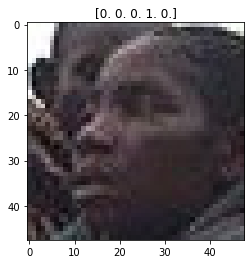

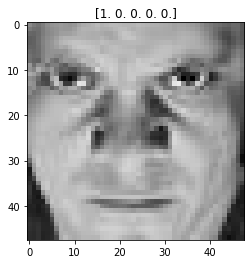

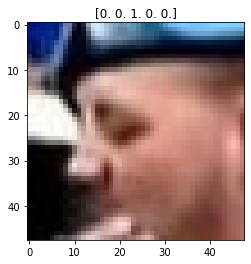

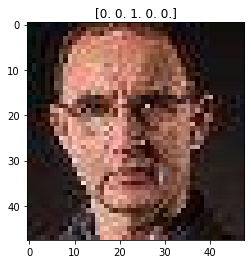

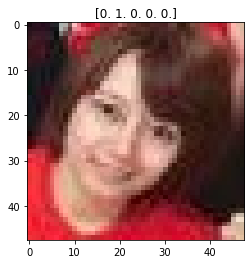

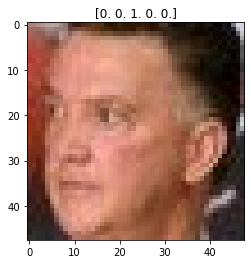

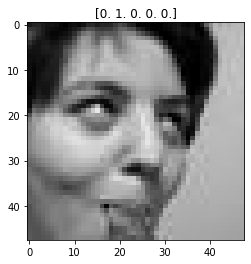

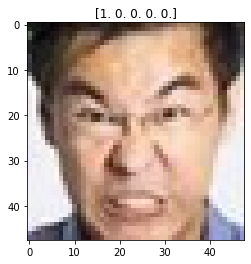

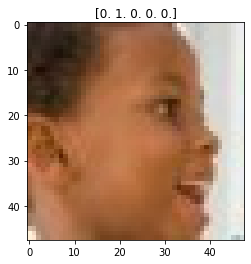

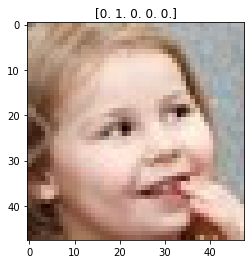

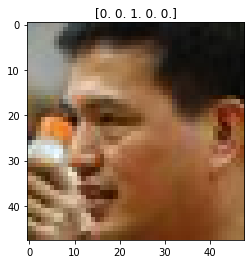

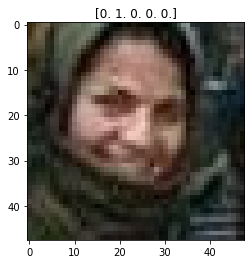

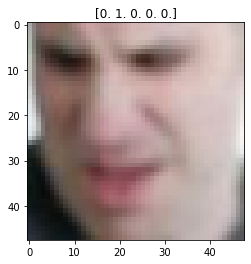

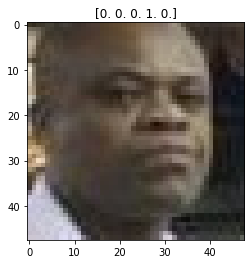

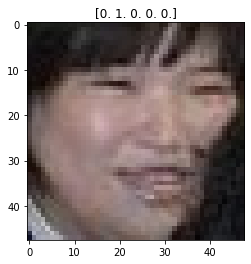

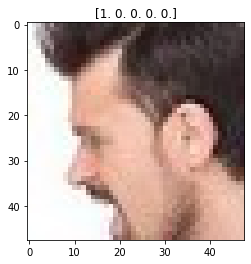

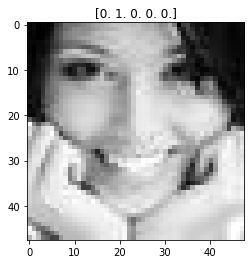

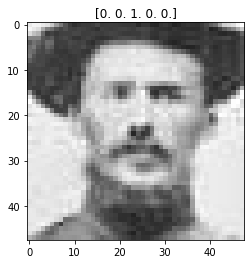

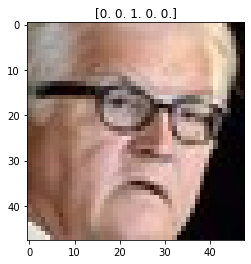

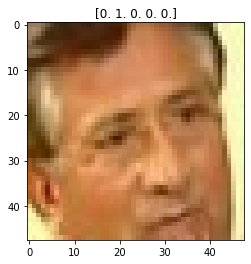

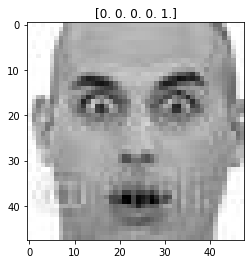

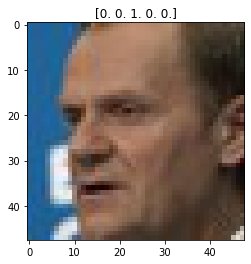

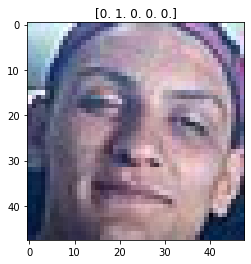

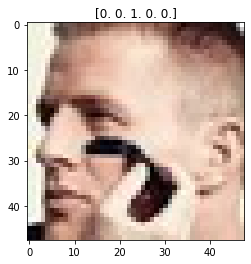

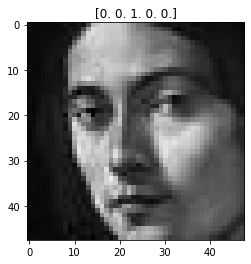

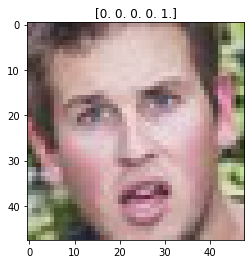

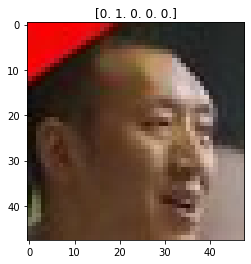

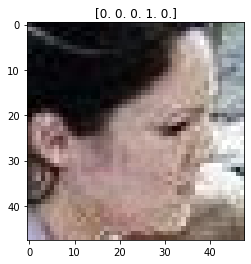

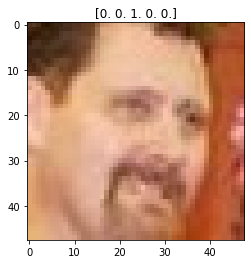

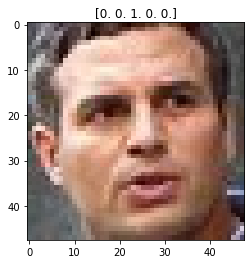

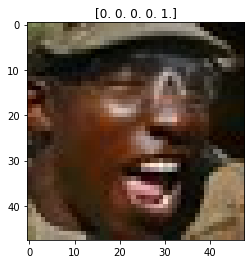

In [179]:
x_batch, y_batch = next(val_data)
for i in range (0,32):
    image = x_batch[i].astype(int)
    plt.imshow(image)
    plt.title(y_batch[i])
    plt.show()

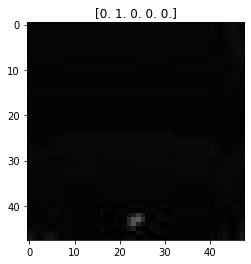

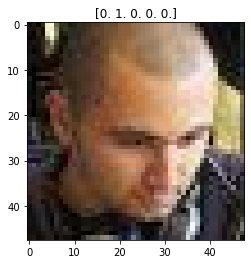

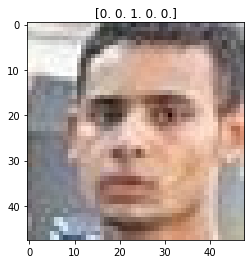

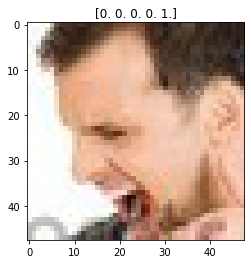

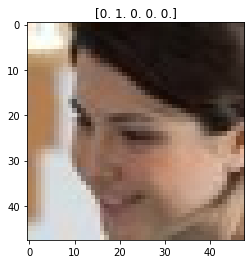

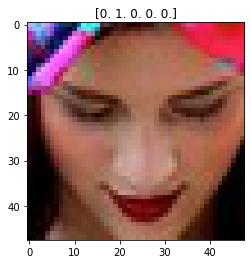

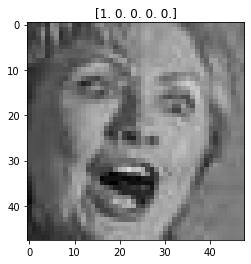

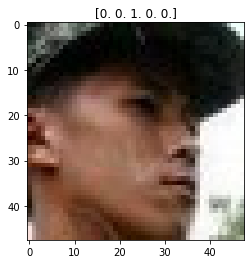

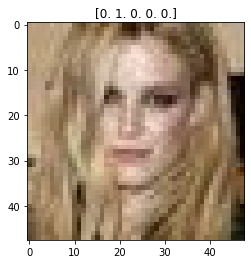

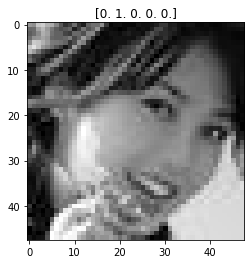

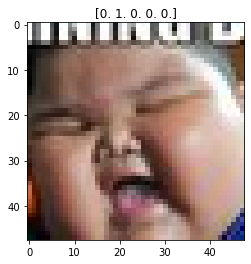

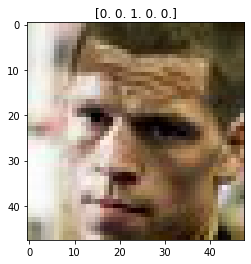

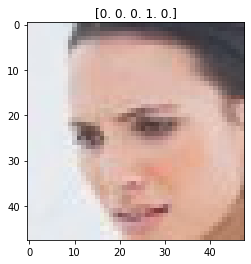

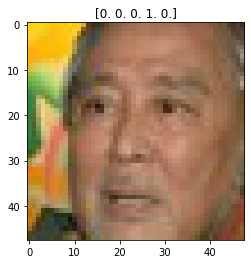

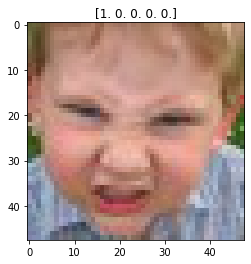

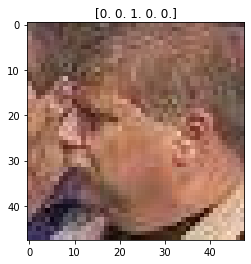

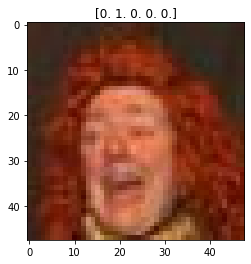

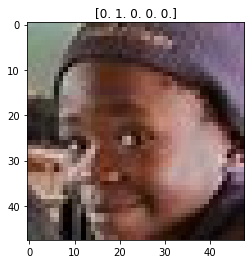

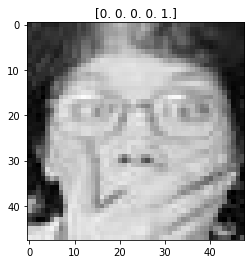

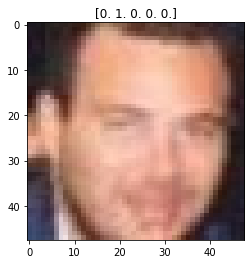

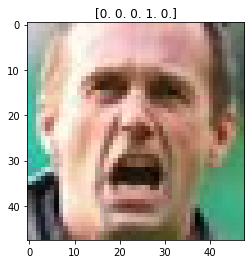

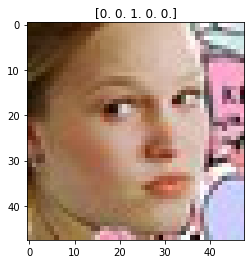

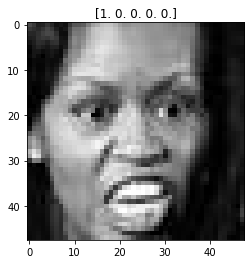

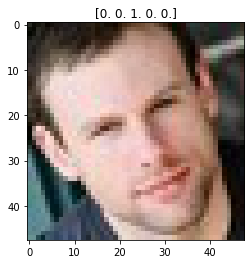

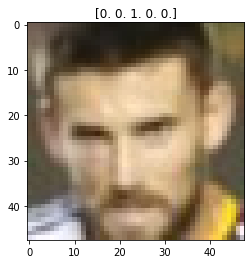

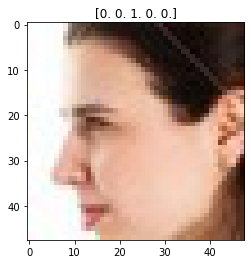

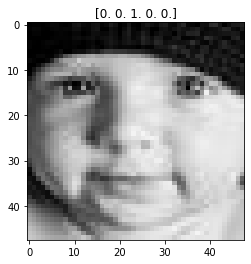

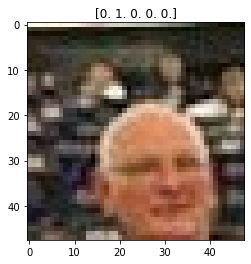

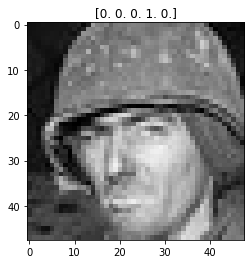

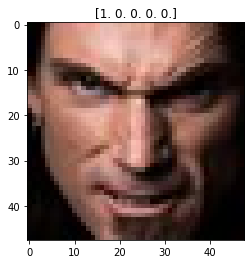

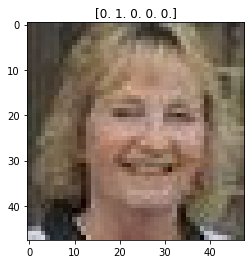

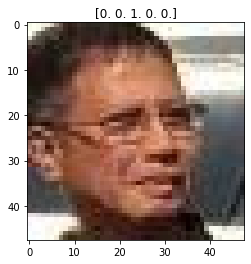

In [180]:
x_batch, y_batch = next(val_data)
for i in range (0,32):
    image = x_batch[i].astype(int)
    plt.imshow(image)
    plt.title(y_batch[i])
    plt.show()

In [181]:
x_batch[0].shape

(48, 48, 3)

### Training of the model

In [182]:
model = Model(lr=0.001, epochs=50)

Model: "Emotion_Detector"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        4864      
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)  

In [183]:
model.train(train_data, val_data)

[INFO] training model...
Epoch 1/50
166/166 [==============================] - 102s 575ms/step - loss: 1.9966 - accuracy: 0.3095 - val_loss: 1.5231 - val_accuracy: 0.3990

Epoch 00001: val_accuracy improved from -inf to 0.39904, saving model to model\emo.h5
Epoch 2/50
166/166 [==============================] - 96s 574ms/step - loss: 1.3636 - accuracy: 0.4698 - val_loss: 1.2982 - val_accuracy: 0.4824

Epoch 00002: val_accuracy improved from 0.39904 to 0.48239, saving model to model\emo.h5
Epoch 3/50
166/166 [==============================] - 98s 588ms/step - loss: 1.1921 - accuracy: 0.5503 - val_loss: 1.3530 - val_accuracy: 0.5032

Epoch 00003: val_accuracy improved from 0.48239 to 0.50321, saving model to model\emo.h5
Epoch 4/50
166/166 [==============================] - 98s 590ms/step - loss: 1.0823 - accuracy: 0.5926 - val_loss: 1.2637 - val_accuracy: 0.5308

Epoch 00004: val_accuracy improved from 0.50321 to 0.53076, saving model to model\emo.h5
Epoch 5/50
166/166 [=================

In [184]:
model.predict(test_data)

[INFO] evaluating network...


(0.9028388857841492, 0.6628357172012329)

              precision    recall  f1-score   support

       angry       0.06      0.08      0.07      1041
       happy       0.35      0.24      0.29      5459
     neutral       0.37      0.46      0.41      5858
         sad       0.13      0.08      0.10      2177
    surprise       0.09      0.13      0.11      1475

    accuracy                           0.28     16010
   macro avg       0.20      0.20      0.20     16010
weighted avg       0.28      0.28      0.28     16010



,wrongly_classified_images,true_labels,pred_labels
0,angry\10Exp0angry_actor_150.jpg,angry,happy
1,angry\12Exp0angry_actor_16.jpg,angry,sad
2,angry\1455Exp0angry_girl_299.jpg,angry,neutral
3,angry\1456Exp0angry_girl_3.jpg,angry,neutral
4,angry\1457Exp0angry_girl_303.jpg,angry,neutral
...,...,...,...
11513,surprise\Surprise.35857.jpg,surprise,neutral
11514,surprise\Surprise.35863.jpg,surprise,sad
11515,surprise\Surprise.35872.jpg,surprise,neutral
11516,surprise\Surprise.35874.jpg,surprise,neutral


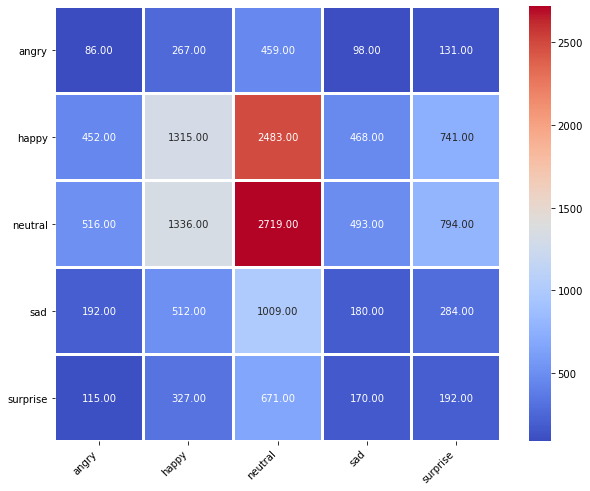

In [185]:
model.error_evaluation(test_data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cm = np.array([[2, 0, 0],
               [0, 0, 1],
               [1, 0, 2]])
class_labels = [1,2,3]

Text(0.5, 51.0, 'predicted')

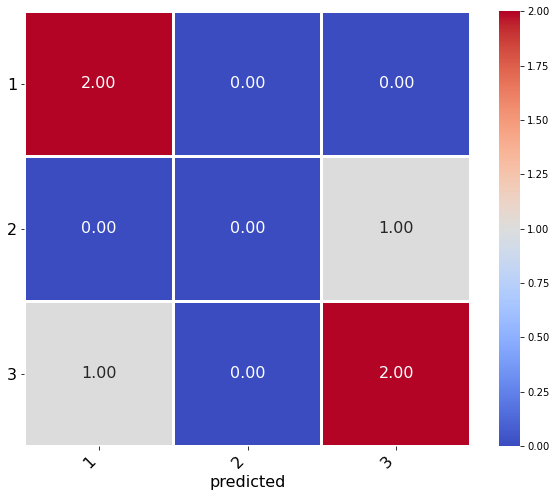

In [12]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, annot=True, lw=2, fmt='.2f', cmap='coolwarm', annot_kws={"size": 16})
ax.set_xticklabels(class_labels, rotation=45, ha="right", fontsize=16)
ax.set_yticklabels(class_labels, rotation=0, fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=16)
ax.set_ylabel('True Label', fontsize=16)